In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
%load_ext autoreload
%autoreload 2

import pysax
import pysequitur
import pyoutlier
import numpy as np 
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## test pyoutlierdetection

In [3]:
detector = pyoutlier.TSOutlierDetection(sax_params = dict(window = 100, stride = 10, nbins = 4, alphabet = "ABCD"), 
                                        sequitur_params = dict(sequitur_path="sequitur/sequitur"))
xs = np.random.randn(1000000)

In [5]:
%time symbols = detector.sax_symbolize(xs)
%time reduced_symbols, reduced_symbol_indices = detector.numerosity_reduce(symbols)
print len(symbols), len(reduced_symbols), len(reduced_symbol_indices)
%time word_occurrences = detector.grammar_induce(reduced_symbols)
%time outliers = detector.mine_infrequent_segments(word_occurrences, threshold=5)

 save temp file at /tmp/tmpgqFfiy
CPU times: user 2.03 s, sys: 150 ms, total: 2.18 s
Wall time: 18 s
CPU times: user 118 ms, sys: 1.68 ms, total: 120 ms
Wall time: 120 ms
99991 78046 78046
CPU times: user 110 ms, sys: 7.08 ms, total: 117 ms
Wall time: 296 ms
CPU times: user 3.87 ms, sys: 12 µs, total: 3.88 ms
Wall time: 3.91 ms


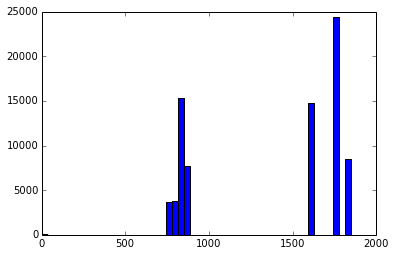

In [6]:
_ = plt.hist(word_occurrences, bins = 50)

In [7]:
[ (i, symbols[i], wc) for i,wc in zip(np.array(reduced_symbol_indices)[outliers], 
                                      np.asarray(word_occurrences)[outliers])]

[(slice(1054, 1055, None), ['BDBB'], 0),
 (slice(7640, 7641, None), ['CACC'], 1),
 (slice(10026, 10027, None), ['CCCA'], 1),
 (slice(10031, 10032, None), ['CACC'], 1),
 (slice(10045, 10046, None), ['DBBC'], 0),
 (slice(14615, 14616, None), ['CCCA'], 1),
 (slice(15136, 15137, None), ['BBDB'], 1),
 (slice(15141, 15142, None), ['DCBB'], 0),
 (slice(17688, 17689, None), ['BDBB'], 0),
 (slice(21007, 21008, None), ['DBBB'], 0),
 (slice(24430, 24431, None), ['CCAC'], 0),
 (slice(29614, 29615, None), ['CCAC'], 0),
 (slice(32889, 32890, None), ['CCAC'], 0),
 (slice(32894, 32895, None), ['ACCC'], 0),
 (slice(45155, 45156, None), ['ACCC'], 0),
 (slice(45933, 45934, None), ['BCCA'], 0),
 (slice(46820, 46821, None), ['ACCC'], 0),
 (slice(46867, 46868, None), ['DBBB'], 0),
 (slice(49383, 49384, None), ['ACCC'], 0),
 (slice(56174, 56175, None), ['CBAC'], 0),
 (slice(58168, 58169, None), ['BBBD'], 0),
 (slice(58171, 58172, None), ['BBDB'], 1),
 (slice(63840, 63841, None), ['BDBB'], 0),
 (slice(67798, 

## usage

In [3]:
## window length should be long enough to cover possible outliers (otherwise outliers will be repeated and become
## patterns). stride should be small to reduce lag of detection.

detector = pyoutlier.TSOutlierDetection(sax_params = dict(window = 200, stride = 20, nbins = 4, alphabet = "ABCD"), 
                                        sequitur_params = dict(sequitur_path="sequitur/sequitur"))
ts = np.random.randn(6000)
ts[1000:1200] = 0
ts[5000:5560] = -1
ts[3000:3100] = np.sin(np.arange(3000, 3100) * 0.25) * 1.2

detector.fit(ts)

save temp file at /tmp/tmpTVJBKK


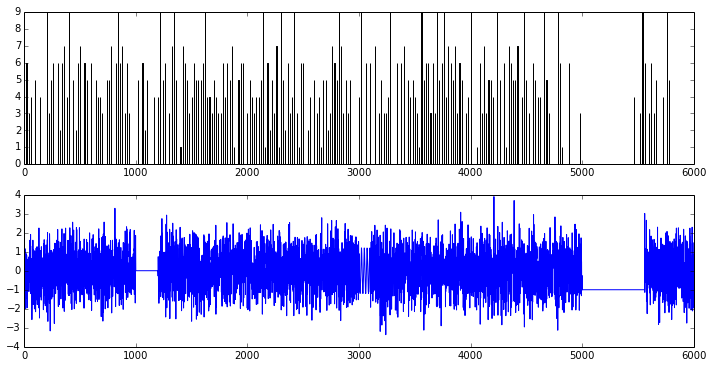

In [4]:
ts_density = detector.timeseries_density()
fig, axes = plt.subplots(2, 1, figsize = (12, 6))
axes[0].bar(*ts_density)
axes[1].plot(range(len(ts)), ts)

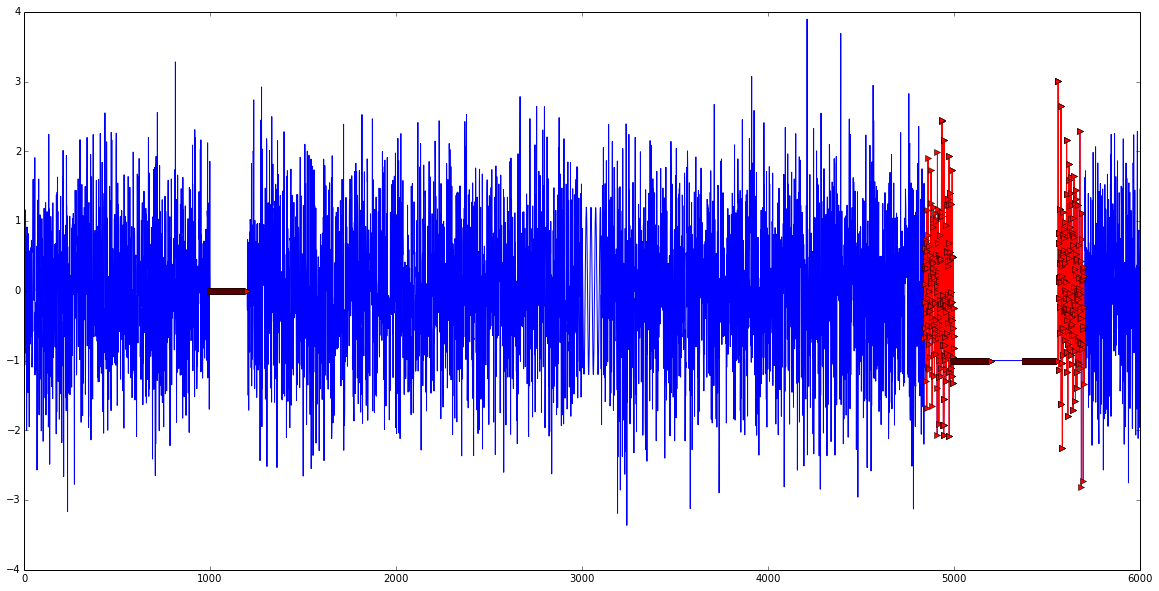

In [5]:
outliers, occurrences = detector.detect_outliers(occurrence_thr=0)
plt.figure(figsize = (20, 10))
plt.plot(range(len(ts)), ts)
for outlier in outliers:
    plt.plot(range(outlier.start, outlier.stop), ts[outlier], "r->")
    
#plt.xlim((4500, 6000))
#plt.xlim((500, 1500))

##test different data

In [70]:
# s = pd.read_table(open("data/chfdb_chf01_275.txt","r"), index_col = 0, header = None, names = ['a','b'])
s = pd.read_table(open("static/data/ecg0606_1.csv","r"), header = None, delim_whitespace = True, names = ['a'])

In [71]:
s

,a
0,-6.095
1,-6.095
2,-6.100
3,-6.100
4,-6.095
5,-6.095
6,-6.100
7,-6.105
8,-6.105
9,-6.115


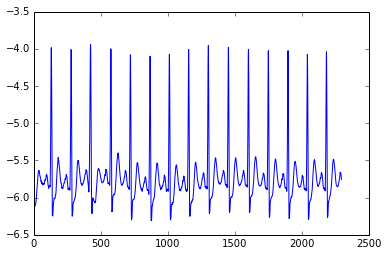

In [72]:
ts = np.asarray(s.a)
plt.plot(ts)

In [73]:
detector = pyoutlier.TSOutlierDetection(sax_params = dict(window = 150, stride = 20, nbins = 4, alphabet = "ABC"), 
                                        sequitur_params = dict(sequitur_path="sequitur/sequitur"))
detector.fit(np.asarray(ts))

save temp file at /tmp/tmpEgdLDC


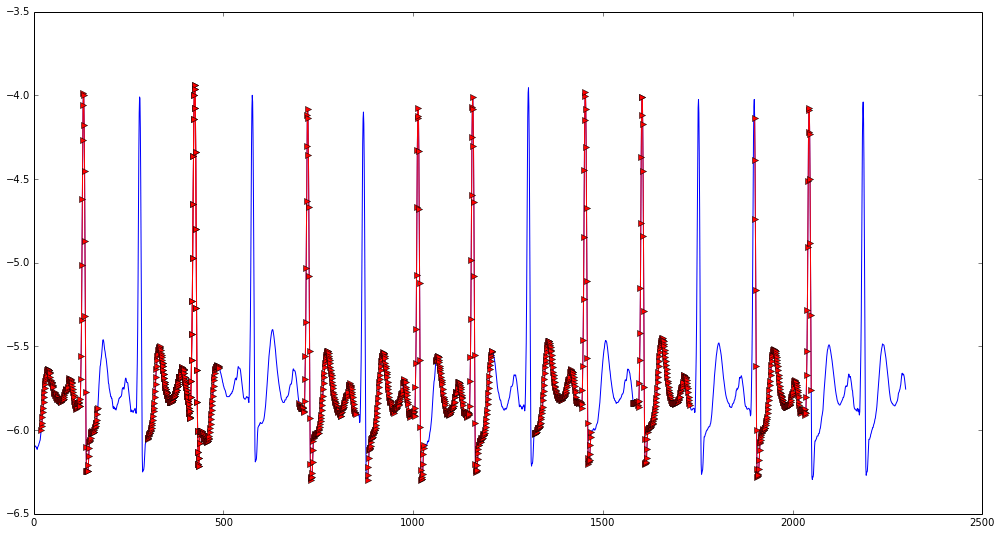

In [74]:
outliers, occurrences = detector.detect_outliers(occurrence_thr=1)
plt.figure(figsize = (17, 9))
plt.plot(range(len(ts)), ts)
for outlier in outliers:
    plt.plot(range(outlier.start, outlier.stop), ts[outlier], "r->")

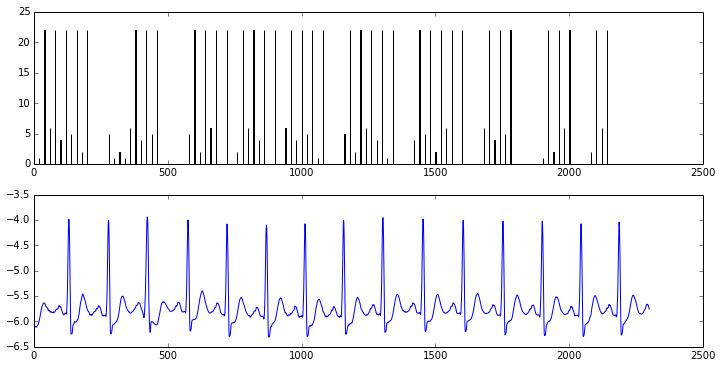

In [75]:
ts_density = detector.timeseries_density()
fig, axes = plt.subplots(2, 1, figsize = (12, 6))
axes[0].bar(*ts_density)
axes[1].plot(range(len(ts)), ts)

In [28]:
detector.word_occurrences

[4,
 4,
 7,
 1,
 2,
 2,
 5,
 3,
 2,
 4,
 4,
 2,
 7,
 2,
 2,
 2,
 5,
 3,
 4,
 2,
 4,
 7,
 2,
 2,
 3,
 5,
 2,
 1,
 3,
 3,
 4,
 2,
 7,
 1,
 2,
 2,
 0,
 3,
 4,
 3,
 3,
 7,
 1,
 2,
 3,
 2,
 5,
 3,
 1,
 4,
 3,
 4,
 4,
 1,
 2,
 2,
 3,
 5,
 3,
 2,
 3,
 4,
 3,
 7,
 0,
 3,
 2,
 5,
 2,
 1,
 2,
 3,
 4,
 4,
 7,
 1,
 2,
 2,
 5,
 2,
 2,
 4,
 3,
 3,
 7,
 2,
 2,
 2,
 5,
 2,
 1,
 3,
 3,
 4,
 2,
 7,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 5,
 0,
 4,
 4,
 7,
 0,
 3,
 5,
 2,
 2,
 4,
 3,
 7,
 2,
 2,
 2,
 0,
 3,
 0,
 4,
 3,
 4,
 7,
 2,
 2,
 2,
 5,
 3,
 2,
 4,
 3,
 7,
 1,
 2,
 3,
 2,
 5,
 3,
 1,
 4,
 2,
 1,
 0,
 3]

In [61]:
outliers[0]

[autoreload of pysax failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "pysax.py", line 184
    target = self.symbolize_window(signal[target_start:target_end])
                                                                  ^
IndentationError: unindent does not match any outer indentation level
]


slice(290, 440, None)

In [32]:
occurrences

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])